In [1]:
import abc
import requests
import urllib3
import re
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import sys
import io
from datetime import date, time, datetime

urllib3.disable_warnings()


DFpath = path = str(pathlib.Path().absolute()) 
Textpath = '../Text//'

dfList = []
fileList = ["/../Planilhas/IBM/IBM_coronavírus_Folha de São Paulo.csv",  
            "/../Planilhas/IBM/IBM_economia_Folha de São Paulo.csv", 
            "/../Planilhas/IBM/IBM_coronavírus_G1.csv", 
            "/../Planilhas/IBM/IBM_economia_G1.csv"]
for i in range(0,len(fileList)):
    df = pd.read_csv(DFpath + fileList[i])
    dfList.append(df)
    sentiment_list = list(df["Sentimento"])
    erros = 0
    for j in range(0, len(sentiment_list)):
        if(sentiment_list[j] < -1):
            print(f"\n Notícia no índice {j} de {i}\n")
            erros += 1

graphicList = []
            
for i in range(0,2):
    dfList[i] = dfList[i].rename(columns={'Sentimento':'FolhaSP', 'Data-Hora':'Data'})
    dfList[i+2] = dfList[i+2].rename(columns={'Sentimento':'G1', 'Data-Hora':'Data'})

for i in range(0,4):
    if(i<2):
        veiculo = 'FolhaSP'
    else:
        veiculo = 'G1'
        
    graphic = dfList[i][[veiculo,'Data']].groupby('Data').mean().reset_index()
    graphic['Data'] = pd.to_datetime(graphic.Data)
    graphic = graphic.loc[graphic.Data >= pd.to_datetime('19/03/2020')]
    graphic.set_index('Data', inplace=True)
    
    graphicList.append(graphic)
            


dfFolha = dfList[0]
dfFolha2 = dfList[1]
dfG1 = dfList[2]
dfG12 = dfList[3]
graficoFolha = graphicList[0]
graficoFolha2 = graphicList[1]
graficoG1 = graphicList[2]
graficoG12 = graphicList[3]

new = pd.read_csv(DFpath+'/../Planilhas/antigas/IBM_coronaFSP2.csv').rename(columns={'Sentimento':'FolhaSP', 'Data-Hora':'Data'})[['Data','FolhaSP']]
new = new.groupby('Data').mean().reset_index()
new['Data'] = pd.to_datetime(new.Data)
new.set_index('Data', inplace=True)
graficoFolha = pd.concat([new, graficoFolha])

graficoFolha


,FolhaSP
Data,
2020-03-19,-0.279213
2020-03-20,-0.331371
2020-03-21,-0.404324
2020-03-22,-0.373047
2020-03-23,-0.254273
2020-03-24,-0.361391
2020-03-25,-0.352923
2020-03-26,-0.315721
2020-03-27,-0.298460


In [53]:
graficoFolha2

,FolhaSP
Data,
2020-03-19,-0.290433
2020-03-20,-0.442551
2020-03-21,-0.493463
2020-03-22,-0.429221
2020-03-23,-0.226750
2020-03-24,-0.452887
2020-03-25,-0.359976
2020-03-26,-0.388263
2020-03-27,-0.444520


In [54]:
graficoG1

,G1
Data,
2020-03-19,-0.321133
2020-03-20,-0.357712
2020-03-21,-0.187687
2020-03-22,-0.460391
2020-03-23,-0.139799
2020-03-24,-0.155820
2020-03-25,-0.193619
2020-03-26,-0.405672
2020-03-27,-0.253619


In [55]:
graficoG12

,G1
Data,
2020-03-19,-0.312112
2020-03-20,-0.363720
2020-03-21,-0.302316
2020-03-22,-0.231285
2020-03-23,-0.383321
2020-03-24,-0.238954
2020-03-25,-0.207728
2020-03-26,-0.091634
2020-03-27,-0.346996


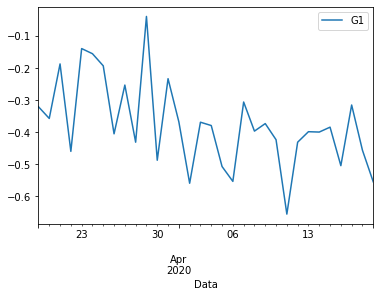

In [56]:
graficoG1.plot()

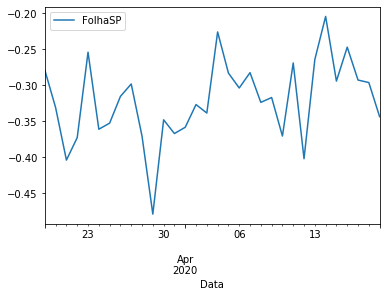

In [57]:
graficoFolha.plot()

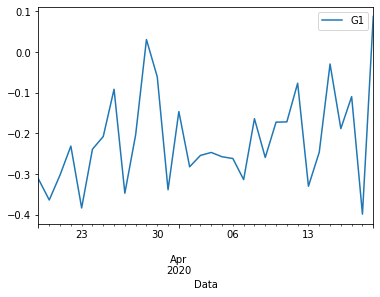

In [58]:
graficoG12.plot()

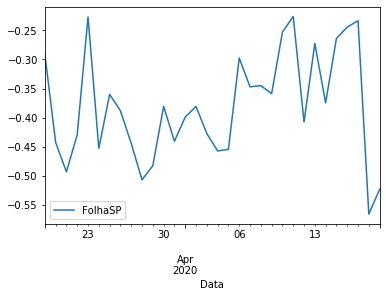

In [59]:
graficoFolha2.plot()

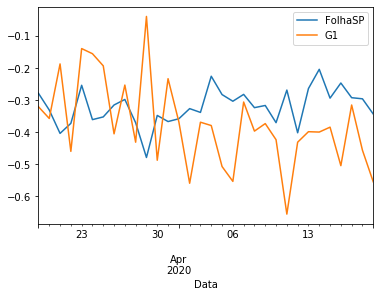

In [64]:
graficoCorona = pd.merge(graficoFolha, graficoG1, how='inner', on='Data')
graficoCorona.plot()

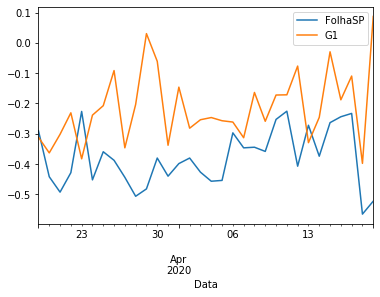

In [66]:
graficoEconomia = pd.merge(graficoFolha2, graficoG12, how='inner', on='Data')
graficoEconomia.plot()